#**Multicollinearity!**
Multicollinearity occurs when two or more independent variables (features) in a regression model are highly correlated with each other.
##**Effects:**
1. Instability in estimates: Coefficients become sensitive to small changes in data.
2. Inflated variance: Standard errors of coefficients increase.
3. Difficulty in interpretation: Coefficients may not accurately represent relationships.
##**Causes:**
1. Correlated features: Features are highly related (e.g., age and experience).
2. Duplicate features: Features are identical or very similar.
3. Interaction terms: Including interaction terms between correlated features.
##**Consequences:**
1. Model instability: Small changes in data significantly affect coefficients.
2. Poor predictions: Model performance suffers due to inflated variance.
3. Misleading conclusions: Incorrect interpretations of coefficient significance.
##**Detection methods:**
1. Correlation matrix: Visualize correlations between features.
2. Variance Inflation Factor (VIF): Measure correlation between each feature and others.
3. Tolerance: Calculate 1 - R^2 for each feature.
##**Remedies:**
1. Feature selection: Remove highly correlated features.
2. Dimensionality reduction: Techniques like PCA, factor analysis.
3. Regularization: Lasso, Ridge regression to reduce coefficient magnitude.
4. Collect more data: Increase sample size to reduce correlation impact.
##**Real-world example:**
Suppose you're modeling house prices based on features like:
1. Number of bedrooms
2. Number of bathrooms
3. Square footage

These features might be highly correlated (multicollinear). Removing or combining redundant features can improve model stability and accuracy.

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Load Titanic dataset
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(titanic_url)


# Preprocess data
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df.drop(['Name', 'Ticket', 'Cabin', 'Age'], axis=1, inplace=True)
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

# Define target variable
y = df['Survived']
X = df.drop('Survived', axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Sex_female   891 non-null    bool   
 6   Sex_male     891 non-null    bool   
 7   Embarked_C   891 non-null    bool   
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(1), int64(4)
memory usage: 39.3 KB


In [34]:
# Correlation matrix
corr_matrix = X.corr()
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
             PassengerId    Pclass     SibSp     Parch      Fare  Sex_female  \
PassengerId     1.000000 -0.035144 -0.057527 -0.001652  0.012658   -0.042939   
Pclass         -0.035144  1.000000  0.083081  0.018443 -0.549500   -0.131900   
SibSp          -0.057527  0.083081  1.000000  0.414838  0.159651    0.114631   
Parch          -0.001652  0.018443  0.414838  1.000000  0.216225    0.245489   
Fare            0.012658 -0.549500  0.159651  0.216225  1.000000    0.182333   
Sex_female     -0.042939 -0.131900  0.114631  0.245489  0.182333    1.000000   
Sex_male        0.042939  0.131900 -0.114631 -0.245489 -0.182333   -1.000000   
Embarked_C     -0.001205 -0.243292 -0.059528 -0.011069  0.269335    0.082853   
Embarked_Q     -0.033606  0.221009 -0.026354 -0.081228 -0.117216    0.074115   
Embarked_S      0.022148  0.081720  0.070941  0.063036 -0.166603   -0.125722   

             Sex_male  Embarked_C  Embarked_Q  Embarked_S  
PassengerId  0.042939   -0.001205   -0.

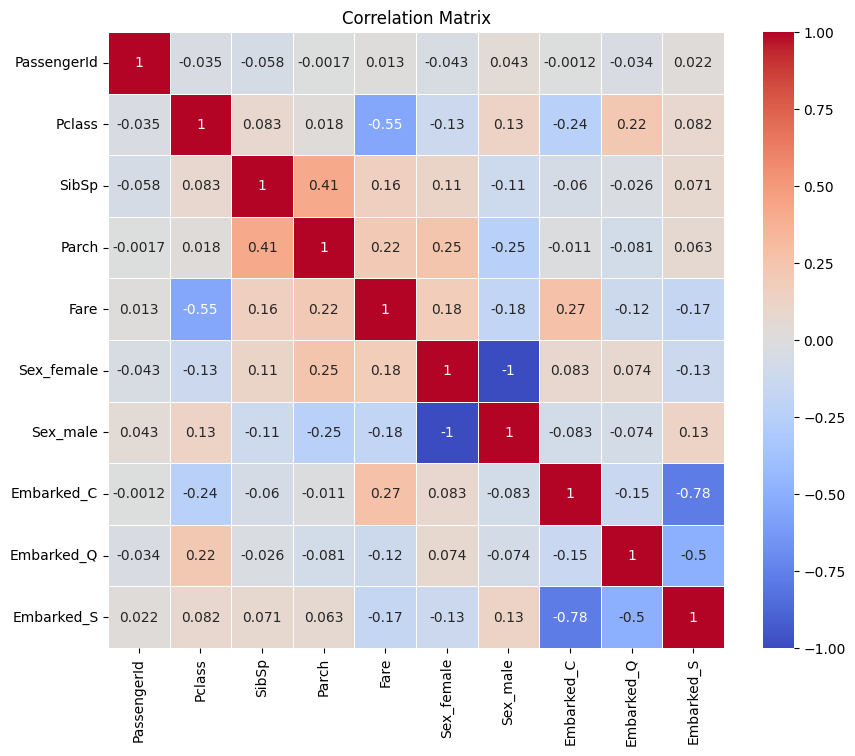

In [35]:
# Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    square=True,
    linewidths=0.5
)
plt.title('Correlation Matrix')
plt.show()

In [36]:
# VIF calculation
vif = pd.DataFrame()
# Convert X to numeric, handling non-numeric values
X_numeric = X.select_dtypes(include=np.number)  # Select only numeric columns
vif["VIF Factor"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
vif["features"] = X_numeric.columns
print("\nVIF:")
print(vif)


VIF:
   VIF Factor     features
0    3.307683  PassengerId
1    3.214364       Pclass
2    1.527685        SibSp
3    1.533333        Parch
4    1.450690         Fare


In [37]:
# Tolerance calculation
tolerance = 1 / vif["VIF Factor"]
print("\nTolerance:")
# Use vif["features"] instead of X.columns to ensure matching lengths
print(pd.DataFrame({"Tolerance": tolerance, "Features": vif["features"]}))


Tolerance:
   Tolerance     Features
0   0.302326  PassengerId
1   0.311104       Pclass
2   0.654585        SibSp
3   0.652174        Parch
4   0.689327         Fare


In [38]:
# Remove features with high VIF (>5)
to_remove = vif[vif["VIF Factor"] > 5]["features"].tolist()
print("\nFeatures to remove:")
print(to_remove)


Features to remove:
[]


In [39]:
# Remove features
X_updated = X.drop(to_remove, axis=1)
X_updated.columns

Index(['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_updated, y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
print("\nLasso Coefficients:")
print(lasso.coef_)


Lasso Coefficients:
[ 0.         -0.03556639 -0.         -0.          0.          0.15789262
 -0.          0.         -0.         -0.        ]


In [41]:
# Ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
print("\nRidge Coefficients:")
print(ridge.coef_)


Ridge Coefficients:
[ 0.0132876  -0.10468962 -0.03464168 -0.01047219  0.01981459  0.12461795
 -0.12461795 -0.00170876 -0.01219746 -0.03918546]


In [42]:
# Evaluate models
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_lasso = (y_pred_lasso > 0.5).astype(int)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_ridge = (y_pred_ridge > 0.5).astype(int)

print("\nLasso Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("Ridge Accuracy:", accuracy_score(y_test, y_pred_ridge))


Lasso Accuracy: 0.7821229050279329
Ridge Accuracy: 0.7877094972067039
